In [1]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

# generating training dataset


In [12]:
n_pts = 100

centers = [[1.0, 1.0], [-1.0, -1.0]]
X, y = datasets.make_blobs(n_samples=n_pts, n_features=2, centers=centers, cluster_std=1.0)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(n_pts, 1))
#print(X.shape)
#print(y_data)

# define scatter plot function

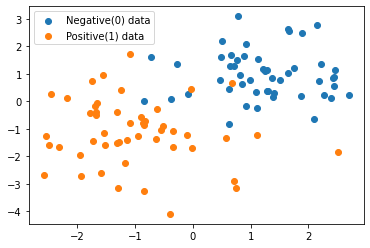

In [14]:
def scatterplot():
  plt.scatter(X[y==0, 0], X[y==0, 1], label='Negative(0) data')
  plt.scatter(X[y==1, 0], X[y==1, 1], label='Positive(1) data')
  #plt.scatter(X[y==2, 0], X[y==2, 1], label='Positive(2) data')
  plt.legend(loc='best')

scatterplot()

# Define model class
z = w1*x1 + w2*x2 + b  -> <br>
y = a = sigma(z) -> <br>
L(y_hat = a, y)


In [18]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x): 
    pred = torch.sigmoid(self.linear(x))
    return pred   #probability (not direct value)

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


# instantiate model class
torch.manual_seed(1)
model = LogisticRegression(2, 1)
print(list(model.parameters()))


[Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True), Parameter containing:
tensor([-0.1371], requires_grad=True)]


# function to get model parameters (w1, w2, b)

In [23]:
[w, b] = model.parameters()
#print(w) 
w1, w2 = w.view(2)

def get_params():
  return (w1.item(), w2.item(), b[0].item())

# show the initial fit plot

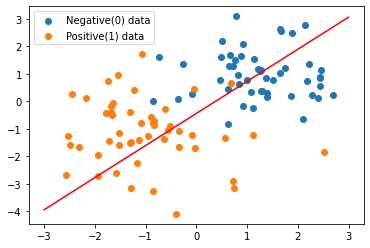

In [26]:
def fitplot():
  w1, w2, b = get_params()
  x1 = np.array([-3, 3])
  # 0 = w1x1 + w2x2 + b
  x2 = (w1*x1 + b)/(-w2)
  plt.plot(x1, x2, 'r')
  scatterplot()
  plt.show()


fitplot()


# training the model 

In [27]:
# instantitate optimizer 
criterion = nn.BCELoss()  # = nn.CrossEntropyLoss() # for LR with more than 2 classes
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

# training the model 
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)

  # calculrate loss 
  loss = criterion(y_pred, y_data)
  print("epoch: ", i, "loss: ", loss.item())
  losses.append(loss.item())

  optimizer.zero_grad() # clear gradients wrt parameters
  loss.backward()
  optimizer.step()

epoch:  0 loss:  0.7606459856033325
epoch:  1 loss:  0.7479277849197388
epoch:  2 loss:  0.7355867028236389
epoch:  3 loss:  0.72361159324646
epoch:  4 loss:  0.7119914293289185
epoch:  5 loss:  0.7007155418395996
epoch:  6 loss:  0.6897732019424438
epoch:  7 loss:  0.6791537404060364
epoch:  8 loss:  0.6688469052314758
epoch:  9 loss:  0.6588428616523743
epoch:  10 loss:  0.6491314172744751
epoch:  11 loss:  0.6397031545639038
epoch:  12 loss:  0.6305485963821411
epoch:  13 loss:  0.6216586232185364
epoch:  14 loss:  0.6130242943763733
epoch:  15 loss:  0.6046371459960938
epoch:  16 loss:  0.5964885950088501
epoch:  17 loss:  0.5885706543922424
epoch:  18 loss:  0.5808754563331604
epoch:  19 loss:  0.5733954906463623
epoch:  20 loss:  0.5661232471466064
epoch:  21 loss:  0.5590517520904541
epoch:  22 loss:  0.5521738529205322
epoch:  23 loss:  0.5454833507537842
epoch:  24 loss:  0.5389735698699951
epoch:  25 loss:  0.532638430595398
epoch:  26 loss:  0.5264720320701599
epoch:  27 los

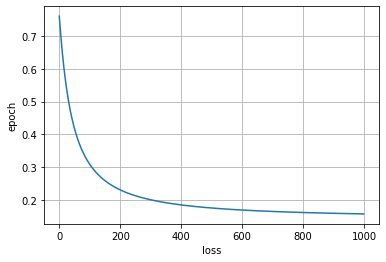

In [31]:
# log loss
plt.plot(range(epochs), losses)
plt.xlabel('loss')
plt.ylabel('epoch')
plt.grid()


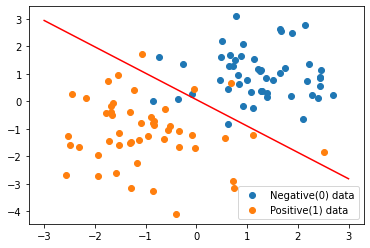

In [33]:
fitplot()

# model evalation with new datasets the model has never seen before

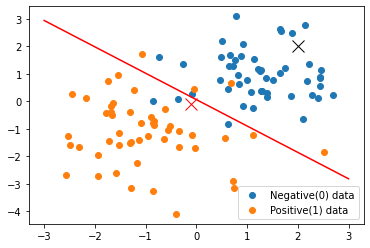

red x (+, 1) prob= 0.6003878116607666
red x's class = 1
blk x (+, 1) prob= 0.0023948128800839186
blk x's class = 0


In [42]:
pnt1 = torch.Tensor([-0.1, -0.1])
pnt2 = torch.Tensor([2.0, 2.0])
plt.plot(pnt1.numpy()[0], pnt1.numpy()[1], 'rx', markersize=12)
plt.plot(pnt2.numpy()[0], pnt2.numpy()[1], 'kx', markersize=12)
fitplot()
print("red x (+, 1) prob= {}".format(model.forward(pnt1).item()))
print("red x's class = {}".format(model.predict(pnt1)))
print("blk x (+, 1) prob= {}".format(model.forward(pnt2).item()))
print("blk x's class = {}".format(model.predict(pnt2)))

